# Seaborn - 고급 그래프
: Matplotlib의 기능과 스타일을 확장한 파이썬 시각 도구의 고급 버전

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Seaborn package에서 제공하는 titanic 데이터셋 가져오기
import seaborn as sns

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 회귀선이 있는 산점도

In [4]:
import matplotlib.pyplot as plt


In [5]:
sns.set_style('darkgrid') # whitegrid, darkgrid, dark, white

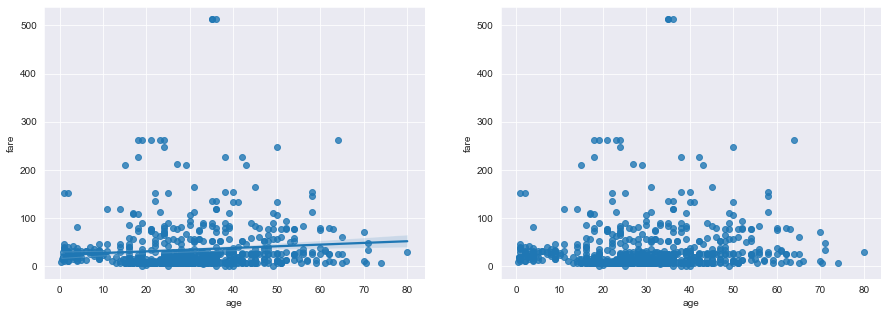

In [6]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 선형 회귀선이 포함된 그래프 그리기
sns.regplot(
    x = 'age',
    y = 'fare',
    data = titanic,
    ax = ax1
)

# 선형 회귀선이 미포함된 그래프 그리기
sns.regplot(
    x = 'age',
    y = 'fare',
    data = titanic,
    ax = ax2,
    fit_reg=False
)

plt.show()

---
### 히스토그램 / 커널밀도그래프
: 커널밀도 함수는 그래프와 X축 사이의 면적이 1이 되도록 그리는 밀도 분포 함수


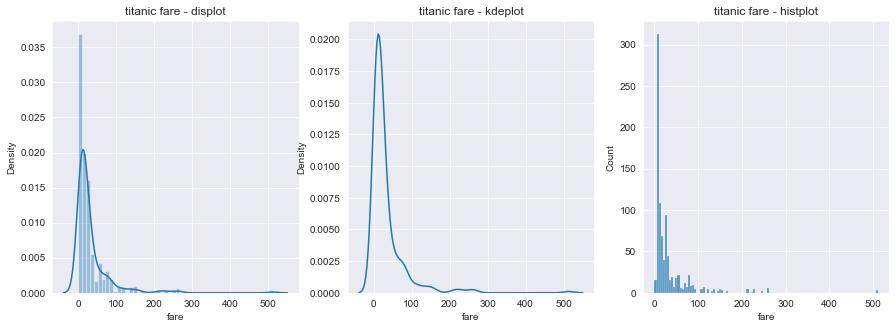

In [7]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 히스토그램 / 커널 밀도
sns.distplot(titanic['fare'], ax=ax1)

# 커널 밀도
sns.kdeplot(titanic['fare'], ax=ax2)

# 히스토그램
#sns.histplot(titanic['fare'], ax=ax3)
sns.histplot(x='fare', data=titanic, ax=ax3)

# 차트제목
ax1.set_title('titanic fare - displot')
ax2.set_title('titanic fare - kdeplot')
ax3.set_title('titanic fare - histplot')

plt.show()

> fare(운임)가 대부분 100달러 미만에 집중 되어 있다.

---
### 히트맵(heatmap)
- 2개의 범주형 변수를 각각 x,y축에 놓고 데이터를 매트릭스 형태로 분류

In [8]:
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


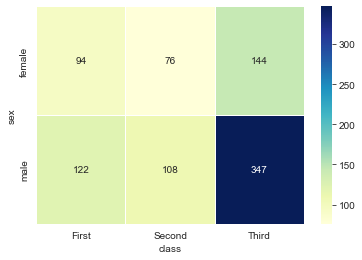

In [9]:
sns.heatmap(
    table,
    annot=True,
    fmt = 'd',   # 정수형 d , 실수형 f
    linewidths=0.5,   # 간격 떨어뜨리기
    cmap='YlGnBu',   # yellow green blue
    cbar=True

)
plt.show()

### 범주형 데이터의 산점도
- 범주형 변수에 들어 있는 각 범주별 데이터의 분포를 확인

In [10]:
sns.set_style('whitegrid')

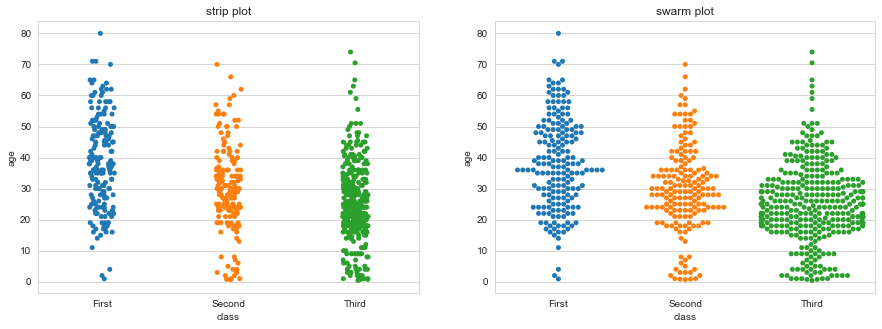

In [11]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.stripplot(
    x = 'class',
    y = 'age',
    data = titanic,
    ax=ax1
)

sns.swarmplot(
    x = 'class',
    y = 'age',
    data = titanic,
    ax=ax2
)

# 차트 제목
ax1.set_title('strip plot')
ax2.set_title('swarm plot')

plt.show()

---
### 막대 그래프

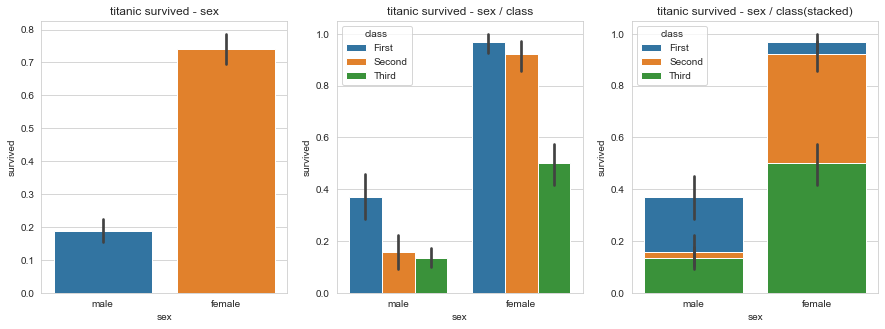

In [12]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# x, y축의 변수 할당
sns.barplot(
    x = 'sex',
    y = 'survived',
    data = titanic,
    ax= ax1,
    #ci='sd'
)

# x, y, hue
sns.barplot(
    x = 'sex',
    y = 'survived',
    hue = 'class',
    data = titanic,
    ax= ax2,
    #ci='sd'
)

# x, y, hue 누적 출력
sns.barplot(
    x = 'sex',
    y = 'survived',
    hue = 'class',
    dodge=False,    # 누적 출력
    data = titanic,
    ax= ax3,
    #ci='sd'
)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex / class')
ax3.set_title('titanic survived - sex / class(stacked)')

plt.show()

오차막대(error bar)
 - 95% 신뢰구간에 대한 오차범위

---
# 빈도 그래프

In [13]:
sns.set_style('whitegrid')

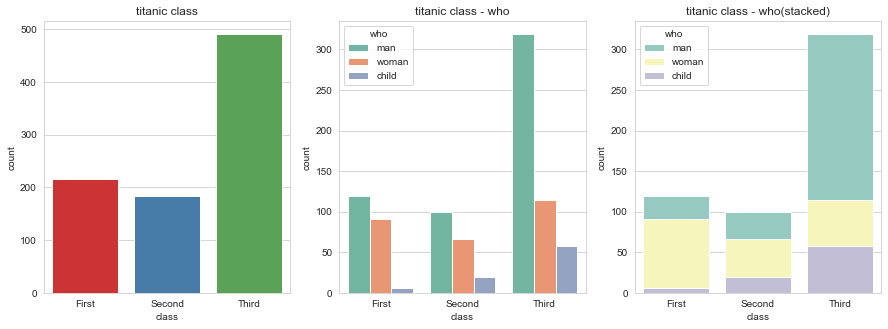

In [19]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값
sns.countplot(
    x = 'class',
    data = titanic,
    palette="Set1",
    ax=ax1
)

# hue
sns.countplot(
    x = 'class',
    hue='who',
    data = titanic,
    palette="Set2",
    ax=ax2
)

# stack
sns.countplot(
    x = 'class',
    hue='who',
    data = titanic,
    palette="Set3",
    dodge=False,
    ax=ax3
)

ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

In [15]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---
# 박스플롯 / 바이올린 그래프
- 박스플롯은 범주형 데이터의 분포와 주요 통계지표를 함께 제공하지만 데이터가 퍼져있는 분산의 정도를 알기 어렵다.
- 바이올린 그래프 : 박스플롯에 커널 밀도 함수 그래프가 추가 (데이터의 분포 보여줌)

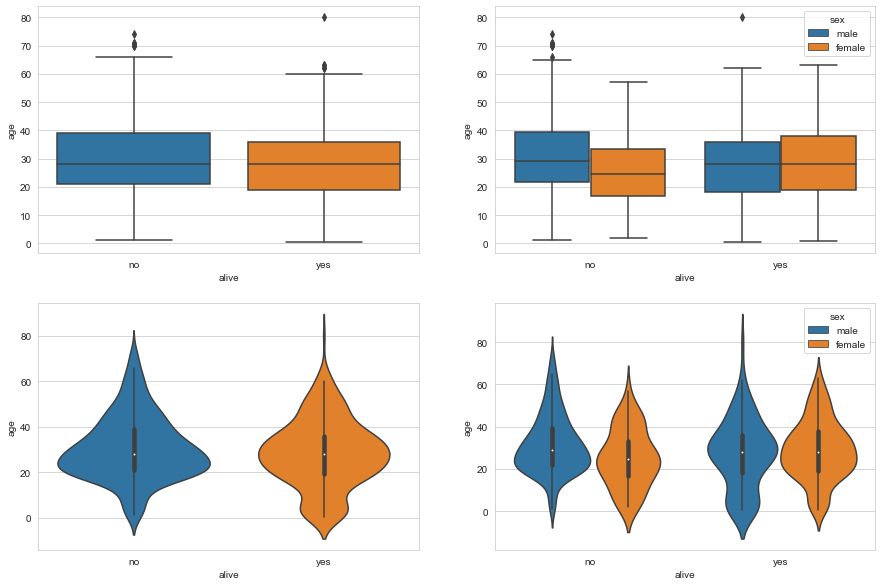

In [25]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# boxplot : 기본값
sns.boxplot(
  x = 'alive',
  y = 'age',
  data = titanic,
  ax = ax1
)

# boxplot : 기본값 - hue:sex
sns.boxplot(
  x = 'alive',
  y = 'age',
  hue = 'sex',
  data = titanic,
  ax = ax2
)

# violinplot : 기본값
sns.violinplot(
  x = 'alive',
  y = 'age',
  data = titanic,
  ax = ax3
)

# violinplot : 기본값 - hue:sex
sns.violinplot(
  x = 'alive',
  y = 'age',
  hue='sex',
  data = titanic,
  ax = ax4
)


plt.show()

In [21]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---
### 조인트 그래프
- 산점도를 기본으로 표시하고 각 축에 대한 히스토그램을 동시 제공

Text(0.5, 0.98, 'titanic fare = kde')

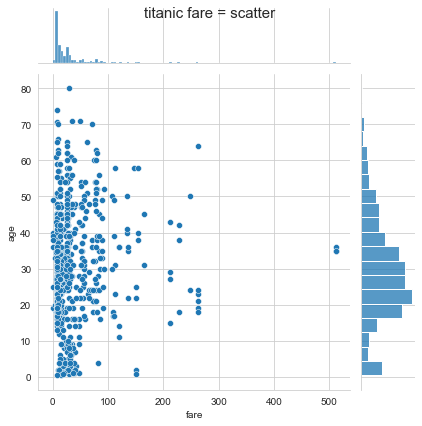

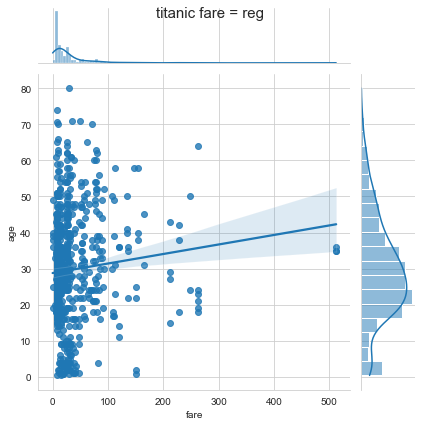

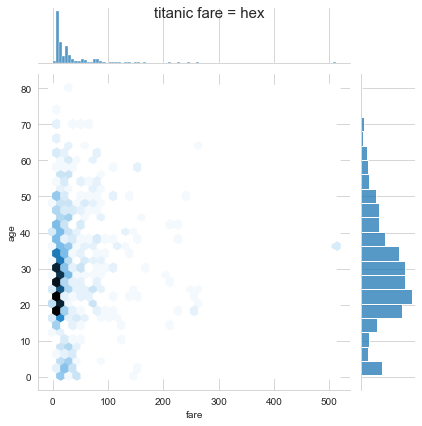

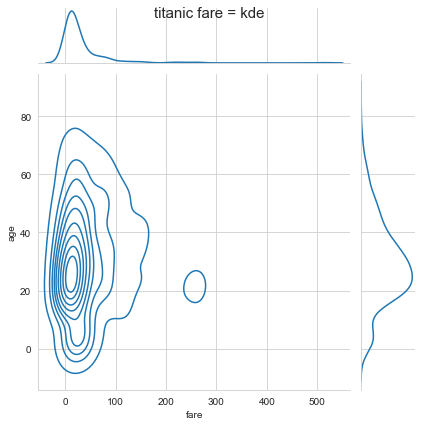

In [32]:
# 조인트 그래프 : 산점도 (기본값)
j1 = sns.jointplot(
  x = 'fare',
  y = 'age',
  data= titanic
)

# 조인트 그래프 : 회귀선
j2 = sns.jointplot(
  x = 'fare',
  y = 'age',
  kind='reg',
  data= titanic
)

# 조인트 그래프 : 육각 그래프
j3 = sns.jointplot(
  x = 'fare',
  y = 'age',
  kind='hex',
  data= titanic
)

# 조인트 그래프 : 커널 밀집 그래프
j4 = sns.jointplot(
  x = 'fare',
  y = 'age',
  kind='kde',
  data= titanic
)

# subtitle 아니고 suptitle
j1.fig.suptitle('titanic fare = scatter', size=15)
j2.fig.suptitle('titanic fare = reg', size=15)
j3.fig.suptitle('titanic fare = hex', size=15)
j4.fig.suptitle('titanic fare = kde', size=15)

---
# 조건을 적용하여 화면을 그리드로 분할하기

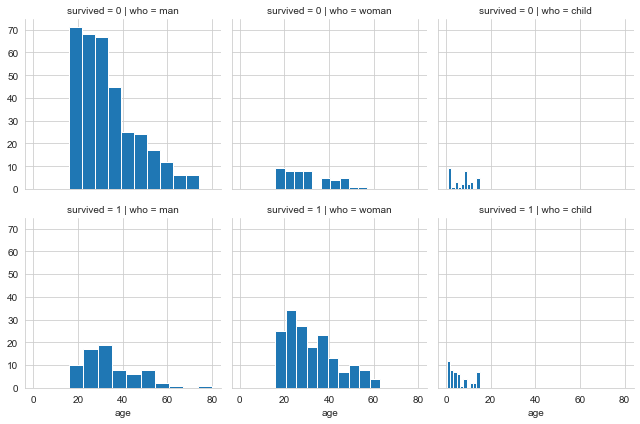

In [33]:
# 조건에 따라 Grid 나누기
# 한꺼번에 각 칼럼에 있는 데이터를 가지고 그래프를 만들어줌
g = sns.FacetGrid(
  data=titanic,
  col='who',
  row='survived'
)

# y축이 가 됨
g = g.map(plt.hist, 'age')

---
### 이변수 데이터 분포
- 매트릭스 형태로 짝을 지어 표현


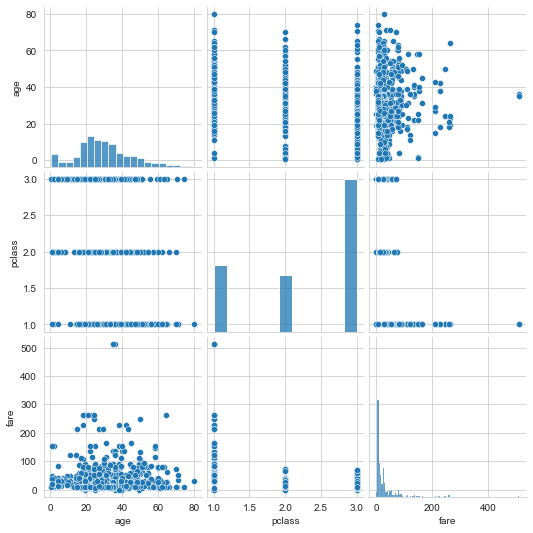

In [35]:
# titanic 데이터 셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[['age','pclass','fare']]

# 조건에 따라 그리드 나누기
sns.pairplot(titanic_pair)

plt.show()